# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import torch

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

## Load in Datasets

To get this project to work properly, please first upload the lung infection prediction folder from canvas into your google drive.<br>This data preprocessing steps to follow will split the files randomly into train and validation folders.

### Bacteria

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import necessary libraries
from PIL import Image
import os

# Define the path to the directory containing your images
bacteria_directory = 'drive/MyDrive/Lung Infection Prediction/bacteria/'

# List all files in the directory
bacteria_images = os.listdir(bacteria_directory)

# Load images into a list
Bacteria = []
for image_file in bacteria_images:
    # Check if the file is an image
    if image_file.endswith('.jpeg'):
        image = Image.open(os.path.join(bacteria_directory, image_file))
        Bacteria.append(image)

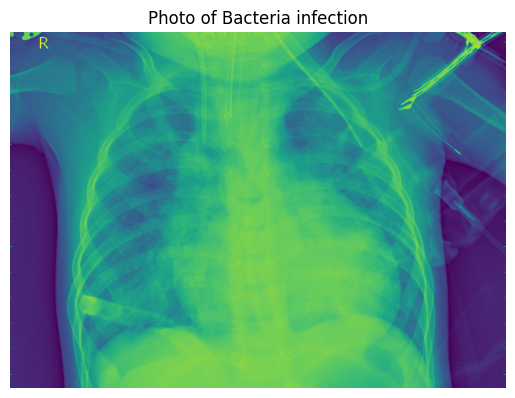

In [5]:
# Display an image
plt.imshow(Bacteria[0])
plt.title('Photo of Bacteria infection'
)
plt.axis('off')
plt.show()

### Virus

In [6]:
# Define the path to the directory
virus_directory = 'drive/MyDrive/Lung Infection Prediction/virus/'

# List all files in the directory
virus_images = os.listdir(virus_directory)

# Load images into a list
virus = []
for image_file in virus_images:
    # Check if the file is an image
    if image_file.endswith('.jpeg'):
        image = Image.open(os.path.join(virus_directory, image_file))
        virus.append(image)

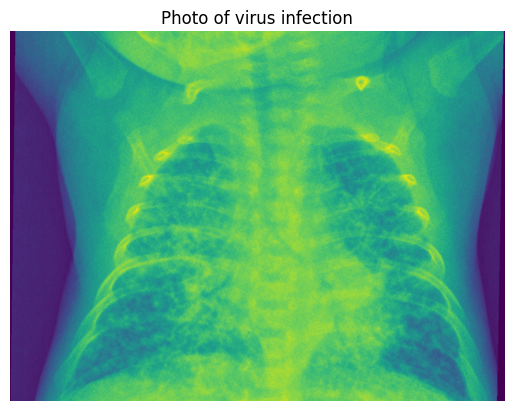

In [7]:
# Display an image
plt.imshow(virus[0])
plt.title('Photo of virus infection'
)
plt.axis('off')
plt.show()

### Normal

In [ ]:
# Define the path to the directory
normal_directory = 'drive/MyDrive/Lung Infection Prediction/normal/'

# List all files in the directory
normal_images = os.listdir(normal_directory)

# Load images into a list
normal = []
for image_file in normal_images:
    # Check if the file is an image
    if image_file.endswith('.jpeg'):
        image = Image.open(os.path.join(normal_directory, image_file))
        normal.append(image)

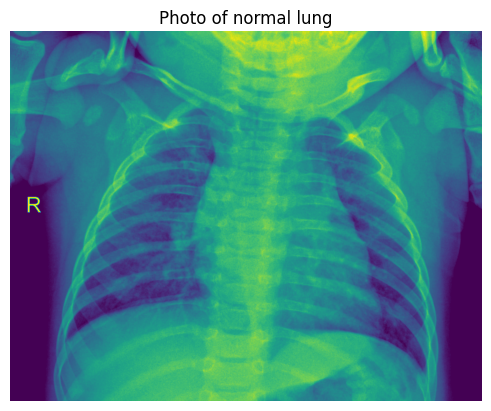

In [ ]:
# Display an image
plt.imshow(normal[0])
plt.title('Photo of normal lung'
)
plt.axis('off')
plt.show()

## Splitting Dataset (Only Do this Once!!!)
We will now split our dataset into train and validation splits for each class. We will perform an 80/20 split.

In [8]:
# Only needs to be done once, files will be stored in your drive
import os
import shutil
import re

base_dir = 'drive/MyDrive/Lung Infection Prediction/'

# Create training folder
files = os.listdir(base_dir)

# Moves all training images to their respective class folders
def train_maker(name):
  train_dir = os.path.join(base_dir, "train", name)
  for f in files:
        search_object = re.search(name, f)
        if search_object:
          shutil.move(os.path.join(base_dir, f), train_dir)

train_maker("bacteria")
train_maker("normal")
train_maker("virus")

# Make the validation directories
os.makedirs("drive/MyDrive/Lung Infection Prediction/val/bacteria")
os.makedirs("drive/MyDrive/Lung Infection Prediction/val/normal")
os.makedirs("drive/MyDrive/Lung Infection Prediction/val/virus")

# Create validation folder

bacteria_train = os.path.join(base_dir, "train", "bacteria")
bacteria_val = os.path.join(base_dir, "val", "bacteria")
normal_train = os.path.join(base_dir, "train", "normal")
normal_val = os.path.join(base_dir, "val", "normal")
virus_train = os.path.join(base_dir, "train", "virus")
virus_val = os.path.join(base_dir, "val", "virus")

bacteria_files = os.listdir(bacteria_train)
normal_files = os.listdir(normal_train)
virus_files = os.listdir(virus_train)


In [9]:
import random
import shutil
# Define the percentage of files to move to validation
validation_percentage = 0.3

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

for category in ['bacteria', 'normal', 'virus']:
    # List all files in the train directory for the current category
    train_files = os.listdir(os.path.join(train_dir, category))

    # Calculate the number of files to move to validation
    num_files_to_move = int(len(train_files) * validation_percentage)

    # Randomly select the files to move
    files_to_move = random.sample(train_files, num_files_to_move)

    # Move the selected files to the validation directory
    for file in files_to_move:
        source_path = os.path.join(train_dir, category, file)
        dest_path = os.path.join(val_dir, category, file)
        shutil.move(source_path, dest_path)

# Create a dictionary to store the counts for each class
counts = {}

# Iterate through the categories and count the number of files in train and validation
for category in ['bacteria', 'normal', 'virus']:
    train_category_path = os.path.join(train_dir, category)
    val_category_path = os.path.join(val_dir, category)

    train_count = len(os.listdir(train_category_path))
    val_count = len(os.listdir(val_category_path))

    counts[category] = {"train": train_count, "validation": val_count}

# Print the counts
for category, count_dict in counts.items():
    print(f"Category: {category}")
    print(f"Train: {count_dict['train']} files")
    print(f"Validation: {count_dict['validation']} files")
    print()

Category: bacteria
Train: 389 files
Validation: 166 files

Category: normal
Train: 392 files
Validation: 168 files

Category: virus
Train: 386 files
Validation: 165 files



## Splitting into Train and Test sets

Now we must combine these datasets and split them into train and test so we can train our model to differentiate between the 3 classes. We must add a label to these images.

### Preprocessing the Training set

In [15]:
train_dir = 'drive/MyDrive/Lung Infection Prediction/train'
valid_dir = 'drive/MyDrive/Lung Infection Prediction/val'

batch_size = 32

# Define image data generators with smaller image size
target_size = (128, 128)  # small to speed up training

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 1167 images belonging to 3 classes.
Found 499 images belonging to 3 classes.


### Training SVM

In [16]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create an ImageDataGenerator for feature extraction
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

# Extract features using the pre-trained model
X_train_features = base_model.predict(train_generator, verbose=1)
y_train = train_generator.classes

# Extract features using the pre-trained model
X_validation_features = base_model.predict(valid_generator, verbose=1)
y_validation = valid_generator.classes  # Extract class labels

16/16 [==============================] - 60s 4s/step


In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Reshape the feature vectors to have 2 dimensions (samples and features)
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_validation_features = X_validation_features.reshape(X_validation_features.shape[0], -1)

# Scale data
sc = StandardScaler()
X_train_features = sc.fit_transform(X_train_features)
X_validation_features = sc.transform(X_validation_features)

# Initialize an SVM classifier
svm_classifier = SVC(kernel='linear', C=1, probability=True)

# Train the SVM model on the flattened feature vectors
svm_classifier.fit(X_train_features, y_train)

SVC(C=1, kernel='linear', probability=True)

In [18]:
# Make predictions on the validation set
y_pred = svm_classifier.predict(X_validation_features)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='weighted')
recall = recall_score(y_validation, y_pred, average='weighted')
f1 = f1_score(y_validation, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.35070140280561124
Precision: 0.3507940761153508
Recall: 0.35070140280561124
F1 Score: 0.3489307439774256


In [20]:
from sklearn.metrics import classification_report

# Define class names
class_names = ["Normal", 'Bacteria', 'Virus']

# Make predictions on the validation set
y_pred = svm_classifier.predict(X_validation_features)

# Generate a classification report
report = classification_report(y_validation, y_pred, target_names=class_names)

print(report)


              precision    recall  f1-score   support

      Normal       0.34      0.41      0.37       166
    Bacteria       0.37      0.36      0.36       168
       Virus       0.34      0.28      0.31       165

    accuracy                           0.35       499
   macro avg       0.35      0.35      0.35       499
weighted avg       0.35      0.35      0.35       499



## Transfer Learning

We will use GoogleNet (EfficientNet) for our transfer learning model.

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

In [ ]:
# Make transforms and use data loaders

# We'll use these a lot, so make them variables
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]

chosen_transforms = {'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]), 'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean_nums, std_nums)
]),
}

In [ ]:
# Set the directory for the data
data_dir = 'drive/MyDrive/Lung Infection Prediction/'

# Use the image folder function to create datasets
chosen_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
  chosen_transforms[x])
                  for x in ['train', 'val']}

In [ ]:
# Make iterables with the dataloaders
dataloaders = {x: torch.utils.data.DataLoader(chosen_datasets[x], batch_size=4,
  shuffle=True, num_workers=2)
              for x in ['train', 'val']}

In [ ]:
dataset_sizes = {x: len(chosen_datasets[x]) for x in ['train', 'val']}
class_names = chosen_datasets['train'].classes

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Visualize some images
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([mean_nums])
    std = np.array([std_nums])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Pause a bit so that plots are updated


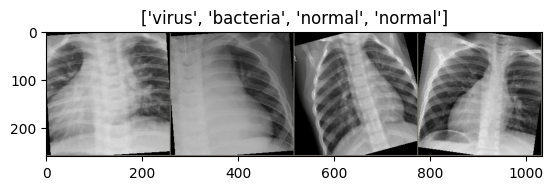

In [ ]:
# Grab some of the training data to visualize
inputs, classes = next(iter(dataloaders['train']))

# Now we construct a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
# Setting up the model
# load in pretrained and reset final fully connected

res_mod = models.googlenet(pretrained=True)

num_ftrs = res_mod.fc.in_features
res_mod.fc = nn.Linear(num_ftrs, 4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 65.6MB/s]


In [ ]:
for name, child in res_mod.named_children():
    print(name)

conv1
maxpool1
conv2
conv3
maxpool2
inception3a
inception3b
maxpool3
inception4a
inception4b
inception4c
inception4d
inception4e
maxpool4
inception5a
inception5b
avgpool
dropout
fc


In [ ]:
res_mod = res_mod.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(res_mod.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            current_loss = 0.0
            current_corrects = 0

            # Here's where the training happens
            print('Iterating through data...')

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # We need to zero the gradients, don't forget it
                optimizer.zero_grad()

                # Time to carry out the forward training poss
                # We only need to log the loss stats if we are in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # We want variables to hold the loss statistics
                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Make a copy of the model if the accuracy on the validation set has improved
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_handeled = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_handeled += 1
                ax = plt.subplot(num_images//2, 2, images_handeled)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_handeled == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

### Training Transfer Learning (1 Hour Runtime)

Epoch 0/6
----------
Iterating through data...
train Loss: 0.8562 Acc: 0.5956
Iterating through data...
val Loss: 0.7991 Acc: 0.6246

Epoch 1/6
----------
Iterating through data...
train Loss: 0.8458 Acc: 0.6144
Iterating through data...
val Loss: 0.6524 Acc: 0.6637

Epoch 2/6
----------
Iterating through data...
train Loss: 0.8338 Acc: 0.6054
Iterating through data...
val Loss: 0.7918 Acc: 0.6517

Epoch 3/6
----------
Iterating through data...
train Loss: 0.7666 Acc: 0.6362
Iterating through data...
val Loss: 0.6007 Acc: 0.7207

Epoch 4/6
----------
Iterating through data...
train Loss: 0.7396 Acc: 0.6624
Iterating through data...
val Loss: 0.5888 Acc: 0.7237

Epoch 5/6
----------
Iterating through data...
train Loss: 0.7458 Acc: 0.6474
Iterating through data...
val Loss: 0.6186 Acc: 0.7087

Epoch 6/6
----------
Iterating through data...
train Loss: 0.7435 Acc: 0.6497
Iterating through data...
val Loss: 0.5967 Acc: 0.7087

Training complete in 73m 54s
Best val Acc: 0.723724


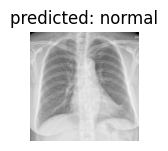

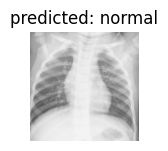

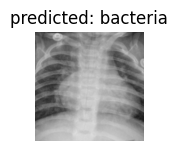

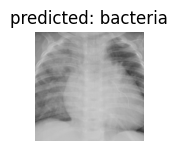

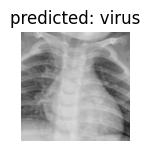

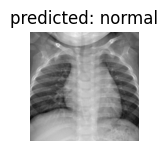

In [ ]:
base_model = train_model(res_mod, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=7)
visualize_model(base_model)
plt.show()

We get a baseline accuracy of 72% for our transfer learning model with EfficientNet

In [ ]:
def get_predictions(model, dataloader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_predictions.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_predictions, all_labels

val_predictions, val_labels = get_predictions(base_model, dataloaders['val'])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

class_labels = ['bacteria', 'normal', 'virus']

# Calculate the confusion matrix and metrics
confusion_matrices = {}
accuracy = {}
precision = {}
recall = {}
f1 = {}

for i, class_label in enumerate(class_labels):
    class_indices = [j for j, label in enumerate(val_labels) if label == i]
    class_predictions = [val_predictions[j] for j in class_indices]
    class_true_labels = [val_labels[j] for j in class_indices]

    cm = confusion_matrix(class_true_labels, class_predictions)
    confusion_matrices[class_label] = cm

    accuracy[class_label] = accuracy_score(class_true_labels, class_predictions)
    precision[class_label] = precision_score(class_true_labels, class_predictions, average='weighted')
    recall[class_label] = recall_score(class_true_labels, class_predictions, average='weighted')
    f1[class_label] = f1_score(class_true_labels, class_predictions, average='weighted')

for class_label in class_labels:
    print(f'Class: {class_label}')
    print('Confusion Matrix:')
    print(confusion_matrices[class_label])
    print(f'Accuracy: {accuracy[class_label]:.2f}')
    print(f'Precision: {precision[class_label]:.2f}')
    print(f'Recall: {recall[class_label]:.2f}')

Class: bacteria
Confusion Matrix:
[[90  5 16]
 [ 0  0  0]
 [ 0  0  0]]
Accuracy: 0.81
Precision: 1.00
Recall: 0.81
Class: normal
Confusion Matrix:
[[  0   0   0]
 [  8 101   3]
 [  0   0   0]]
Accuracy: 0.90
Precision: 1.00
Recall: 0.90
Class: virus
Confusion Matrix:
[[ 0  0  0]
 [ 0  0  0]
 [48 12 50]]
Accuracy: 0.45
Precision: 1.00
Recall: 0.45


We see that the virus class gets confused with the bacteria class often.

In [ ]:
import matplotlib.pyplot as plt

# Extracted training and validation accuracy values for each epoch
training_accuracy = [0.5956, 0.6144, 0.6054, 0.6362, 0.6624, 0.6474, 0.6497]
validation_accuracy = [0.6246, 0.6637, 0.6517, 0.7207, 0.7237, 0.7087, 0.7087]

# 6 epochs
epochs = range(1, len(training_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o', linestyle='-')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Different Approach (TensorFlow)

In [ ]:
from tensorflow.keras.applications import InceptionV3

# Load the InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(units=3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

num_classes = 3

optimizer = Adam(epsilon=0.01)

model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'drive/MyDrive/Lung Infection Prediction/train'
valid_dir = 'drive/MyDrive/Lung Infection Prediction/val'

batch_size = 32

# Define image data generators with smaller image size
target_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Update the target_size parameter
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Found 1167 images belonging to 3 classes.
Found 499 images belonging to 3 classes.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=7,
)

Epoch 1/7
42/42 [==============================] - 349s 8s/step - loss: 1.0120 - accuracy: 0.4479 - val_loss: 0.9600 - val_accuracy: 0.4745
Epoch 2/7
42/42 [==============================] - 234s 6s/step - loss: 0.7062 - accuracy: 0.6122 - val_loss: 0.9482 - val_accuracy: 0.5255
Epoch 3/7
42/42 [==============================] - 226s 5s/step - loss: 0.6317 - accuracy: 0.6887 - val_loss: 0.8806 - val_accuracy: 0.6006
Epoch 4/7
42/42 [==============================] - 235s 6s/step - loss: 0.5834 - accuracy: 0.7209 - val_loss: 0.6747 - val_accuracy: 0.6637
Epoch 5/7
42/42 [==============================] - 228s 5s/step - loss: 0.5191 - accuracy: 0.7547 - val_loss: 0.7317 - val_accuracy: 0.6847
Epoch 6/7
42/42 [==============================] - 232s 5s/step - loss: 0.4957 - accuracy: 0.7614 - val_loss: 0.6353 - val_accuracy: 0.6817
Epoch 7/7
42/42 [==============================] - 234s 6s/step - loss: 0.5180 - accuracy: 0.7607 - val_loss: 0.5011 - val_accuracy: 0.7748


We achieve a remarkable 77.5% accuracy with this new model even with our input sizes shrinked. We can notice that the model has not converged yet, so it might be beneficial to implement more epochs. We will try and do that as well as maybe add more Dense layers to our model.

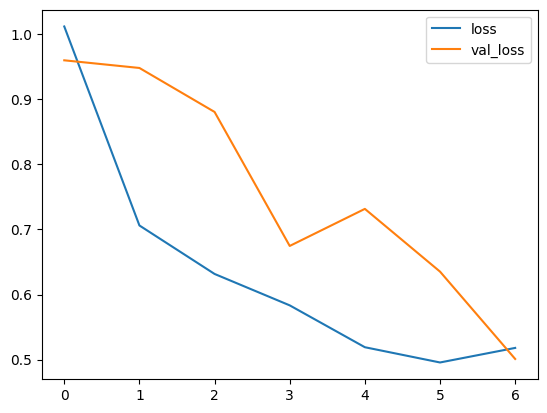

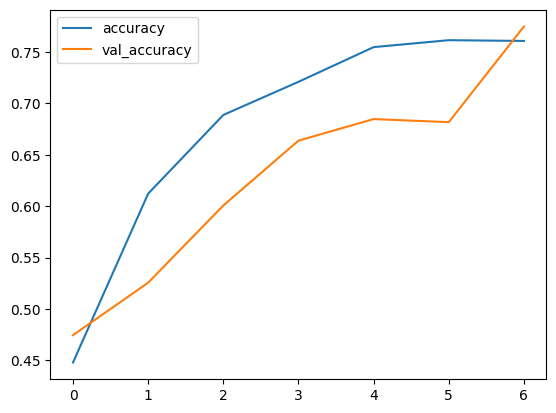

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

First we attempt to increase the amount of epochs.

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=25,
)

Epoch 1/25
37/37 [==============================] - 426s 11s/step - loss: 1.0177 - accuracy: 0.4850 - val_loss: 1.2387 - val_accuracy: 0.3828
Epoch 2/25
37/37 [==============================] - 210s 6s/step - loss: 0.7861 - accuracy: 0.6178 - val_loss: 0.9756 - val_accuracy: 0.6072
Epoch 3/25
37/37 [==============================] - 208s 6s/step - loss: 0.6632 - accuracy: 0.6924 - val_loss: 0.7316 - val_accuracy: 0.6493
Epoch 4/25
37/37 [==============================] - 208s 6s/step - loss: 0.5971 - accuracy: 0.7232 - val_loss: 0.7077 - val_accuracy: 0.6713
Epoch 5/25
37/37 [==============================] - 209s 6s/step - loss: 0.5622 - accuracy: 0.7429 - val_loss: 1.0873 - val_accuracy: 0.5812
Epoch 6/25
37/37 [==============================] - 209s 6s/step - loss: 0.5048 - accuracy: 0.7669 - val_loss: 1.5163 - val_accuracy: 0.5511
Epoch 7/25
37/37 [==============================] - 207s 6s/step - loss: 0.4710 - accuracy: 0.7721 - val_loss: 0.8337 - val_accuracy: 0.6774
Epoch 8/25
3

However, we are unable to achieve better results just by increasing the amount of epochs. We see from the plots that the model begins to overfit.

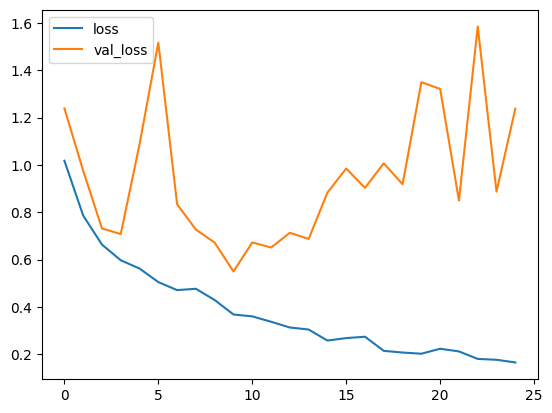

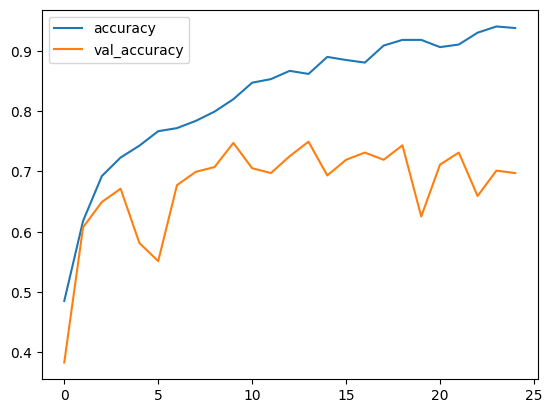

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## Adding Complexity

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

num_classes = 3

optimizer = Adam(epsilon=0.01)

model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'drive/MyDrive/Lung Infection Prediction/train'
valid_dir = 'drive/MyDrive/Lung Infection Prediction/val'

batch_size = 32

# Define image data generators with smaller image size
target_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Update the target_size parameter
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1333 images belonging to 3 classes.
Found 333 images belonging to 3 classes.


Epoch 1/15
42/42 [==============================] - 253s 5s/step - loss: 0.9550 - accuracy: 0.5034 - val_loss: 0.7470 - val_accuracy: 0.7057
Epoch 2/15
42/42 [==============================] - 232s 6s/step - loss: 0.7818 - accuracy: 0.6309 - val_loss: 0.6502 - val_accuracy: 0.7778
Epoch 3/15
42/42 [==============================] - 233s 5s/step - loss: 0.6957 - accuracy: 0.7022 - val_loss: 0.5793 - val_accuracy: 0.7778
Epoch 4/15
42/42 [==============================] - 231s 6s/step - loss: 0.6246 - accuracy: 0.7254 - val_loss: 0.5999 - val_accuracy: 0.7237
Epoch 5/15
42/42 [==============================] - 224s 5s/step - loss: 0.6422 - accuracy: 0.7367 - val_loss: 0.6306 - val_accuracy: 0.7598
Epoch 6/15
42/42 [==============================] - 231s 5s/step - loss: 0.5141 - accuracy: 0.7697 - val_loss: 0.4873 - val_accuracy: 0.7898
Epoch 7/15
42/42 [==============================] - 230s 5s/step - loss: 0.5585 - accuracy: 0.7742 - val_loss: 0.5959 - val_accuracy: 0.7568
Epoch 8/15
42

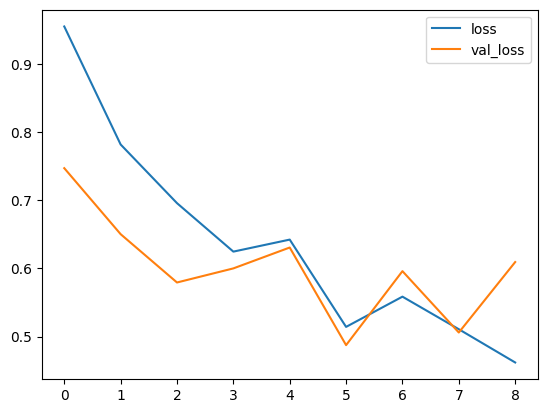

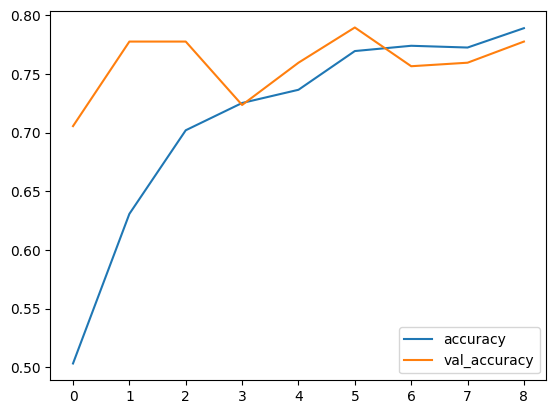

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
)

# Fit the model with early stopping
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=15,
    callbacks=[early_stopping],
)

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

With a more complex model including multiple hidden layers and added dropout for regularization, we achieve a better validation accuracy of 79%.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and true labels for the validation set
val_predictions = model.predict(valid_generator)
val_labels = valid_generator.classes

# Convert predictions to class labels
predicted_classes = np.argmax(val_predictions, axis=1)

# Create a classification report
class_labels = ['bacteria', 'normal', 'virus']
print(classification_report(val_labels, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

    bacteria       0.69      0.84      0.76       111
      normal       0.99      0.89      0.94       112
       virus       0.72      0.64      0.68       110

    accuracy                           0.79       333
   macro avg       0.80      0.79      0.79       333
weighted avg       0.80      0.79      0.79       333



We analyze the performance across classes using precision, recall, and f1-score metrics.

## More regularization

We add more regularization to our model by increasing the dropout percentage. We also try different activation functions by including a tanh in the 2nd hidden layer.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.8),
    layers.Dense(units=256, activation='tanh'),
    layers.Dropout(0.7),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=3, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

num_classes = 3

optimizer = Adam(epsilon=0.01)

model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

Epoch 1/25
37/37 [==============================] - 244s 6s/step - loss: 1.3176 - accuracy: 0.4319 - val_loss: 0.6318 - val_accuracy: 0.7335
Epoch 2/25
37/37 [==============================] - 213s 6s/step - loss: 0.8762 - accuracy: 0.6127 - val_loss: 1.0089 - val_accuracy: 0.6854
Epoch 3/25
37/37 [==============================] - 213s 6s/step - loss: 0.6869 - accuracy: 0.7095 - val_loss: 1.4143 - val_accuracy: 0.6433
Epoch 4/25
37/37 [==============================] - 212s 6s/step - loss: 0.5886 - accuracy: 0.7412 - val_loss: 1.0084 - val_accuracy: 0.7355
Epoch 5/25
37/37 [==============================] - 211s 6s/step - loss: 0.5090 - accuracy: 0.7892 - val_loss: 1.0649 - val_accuracy: 0.7054
Epoch 6/25
37/37 [==============================] - 211s 6s/step - loss: 0.4794 - accuracy: 0.8141 - val_loss: 1.0223 - val_accuracy: 0.7014


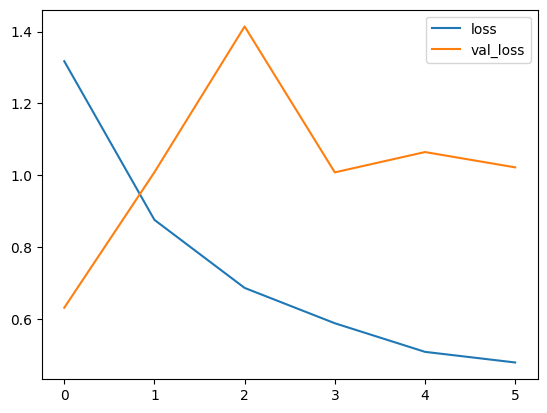

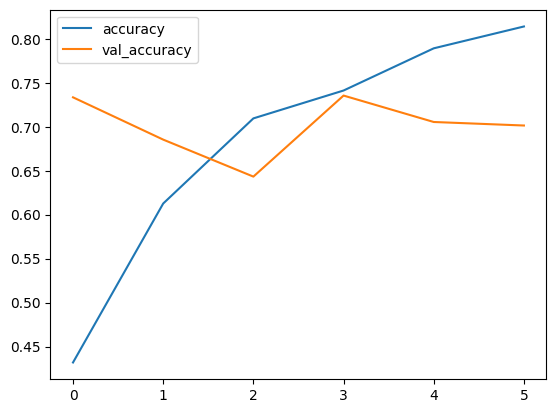

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

# Fit the model with early stopping
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=25,
    callbacks=[early_stopping],
)

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and true labels for the validation set
val_predictions = model.predict(valid_generator)
val_labels = valid_generator.classes

# Convert predictions to class labels
predicted_classes = np.argmax(val_predictions, axis=1)

# Create a classification report
class_labels = ['bacteria', 'normal', 'virus']
print(classification_report(val_labels, predicted_classes, target_names=class_labels))

16/16 [==============================] - 21s 1s/step
              precision    recall  f1-score   support

    bacteria       0.79      0.49      0.60       166
      normal       0.88      0.94      0.91       168
       virus       0.59      0.77      0.66       165

    accuracy                           0.73       499
   macro avg       0.75      0.73      0.73       499
weighted avg       0.75      0.73      0.73       499



However, with these changes we don't achieve better results.

## Adjusting Learning Rate

We try and adjust the learning rate in our PyTorch model when we used Stochastic Gradient Descent. We try decreasing the learning rate to see if we can get better model performance.

In [ ]:
from torch import nn
from torchvision import models

# Load pretrained GoogLeNet
res_mod = models.googlenet(pretrained=True)

# Get the number of input features for the classifier block
num_ftrs = res_mod.fc.in_features

# Replace the classifier block with a new structure
res_mod.fc = nn.Sequential(
    nn.Linear(num_ftrs, 16),
    nn.ReLU(),
    nn.Linear(16, 6),
    nn.ReLU(),
    nn.Linear(6, 3)
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for name, child in res_mod.named_children():
    print(name)

conv1
maxpool1
conv2
conv3
maxpool2
inception3a
inception3b
maxpool3
inception4a
inception4b
inception4c
inception4d
inception4e
maxpool4
inception5a
inception5b
avgpool
dropout
fc


In [ ]:
res_mod = res_mod.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(res_mod.parameters(), lr=0.0007)  # Decreased learning rate

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            current_loss = 0.0
            current_corrects = 0

            # Here's where the training happens
            print('Iterating through data...')

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # We need to zero the gradients, don't forget it
                optimizer.zero_grad()

                # Time to carry out the forward training poss
                # We only need to log the loss stats if we are in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # We want variables to hold the loss statistics
                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / dataset_sizes[phase]
            epoch_acc = current_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # Make a copy of the model if the accuracy on the validation set has improved
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def imshow(inp, title=None, color='black'):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title, color=color)
    plt.pause(0.001)  # pause a bit so that plots are updated


def visualize_model(model, dataloaders, class_names, device, num_images=6):
    was_training = model.training
    model.eval()
    images_handled = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_handled += 1
                ax = plt.subplot(num_images//2, 2, images_handled)
                ax.axis('off')

                # Check if the prediction is correct
                correct_prediction = preds[j] == labels[j]

                # Set the title color based on the correctness
                title_color = 'green' if correct_prediction else 'red'

                # Include both predicted and actual labels in the title
                title = f'Actual: {class_names[labels[j]]}\nPredicted: {class_names[preds[j]]}'
                ax.set_title(title, color=title_color)
                imshow(inputs.cpu().data[j])

                if images_handled == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

### Training Transfer Learning (1 Hour Runtime)

In [ ]:
base_model = train_model(res_mod, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=15)

# import matplotlib.pyplot as plt
# visualize_model(base_model)
# plt.show()

Epoch 1/15
----------
Iterating through data...
train Loss: 1.1015 Acc: 0.3333
Iterating through data...
val Loss: 1.1005 Acc: 0.3327

Epoch 2/15
----------
Iterating through data...
train Loss: 1.1003 Acc: 0.3333
Iterating through data...
val Loss: 1.0996 Acc: 0.3327

Epoch 3/15
----------
Iterating through data...


KeyboardInterrupt: ignored

We stopped the model after only a couple ephcs because it was taking an extremely long time and the learning rate was clearly not working based on the validation accuracy.